## Introduction

In this project, we'll work with exit surveys from employees of the [Department of Eduation, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) Institute in Queensland, Australia. 

In this project, we'll play the role of data analyst and pretend our stakeholders want to now the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been here longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple of columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the prticipant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple of columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's empoyment (in years)

In [110]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [111]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

The `dete_survey` dataframe has 822 rows and 56 columns, with most columns being of the `object` data type, followed by the `bool` data type, and only one column of the `int64` data type.

In [112]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [113]:
# display null values in data frame
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The largest number of null values in the `dete_survey` data frame appear to be in the last five columns `Aboriginal`: `806`, `Torres Strait`: `819`, `South Sea`: `815`, `Disability`: `799` and `NESB`: `790`, followed by the `Business Unit`: `696` and `Classification`: `367` columns.

In [114]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

The `tafe_survey` dataframe has 702 rows and 72 columns, with all the columns being of the `object` data type, barring two `float64` columns.

In [115]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [116]:
# display null values in data frame
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

Null values in the `tafe_survey` data set are spread out across the board.

The following observations can be made on examination of the two data sets:

- The `dete_survey` dataframe contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
- Both `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate that an employee resigned because they were dissatisfied.

## Identify Missing Values and Drop Unnecessary Columns

In [117]:
# read the 'Not Stated' value as 'NaN'
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])

In [118]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

The `dete_survey` dataframe has been reduced to 35 columns.

In [119]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

The `tafe_survey` dataframe has been reduced to 23 columns.

All the columns that are unnecessary for the analysis have been removed from both the dataframes.

## Clean Column Names

In [120]:
# update column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [121]:
# update column names
tafe_survey_updated.rename(
    {'Record ID': 'id',
     'CESSATION YEAR': 'cease_date',
     'Reason for ceasing employment': 'separationtype',
     'Gender. What is your Gender?': 'gender',
     'CurrentAge. Current Age': 'age',
     'Employment Type. Employment Type': 'employment_status',
     'Classification. Classification': 'position',
     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }, axis=1, inplace=True)

In [122]:
print(dete_survey_updated.head())

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [123]:
print(tafe_survey_updated.head())

             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   
2       Delivery (teaching)      2010.0        Retirement   
3  Non-Delivery (corporate)      2010.0       Resignation   
4       Delivery (teaching)      2010.0       Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   
3                                                  -   
4   

After having removed all the unnecessary columns the names of all the relevant columns have been changed for standardisation so that both the dataframes could be seamlessly merged further in the analysis.

## Filter the Data

In [124]:
# display unique values in the separationtype column of both the dataframes
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [125]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation-')].copy()

dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [126]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)].copy()

tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

For our analysis, we shall focus on the survey respondents who resigned, so their separation type contains the string `'Resignation'`.

## Verify the Data

In [127]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [128]:
pattern = r"([2][0][0-2][0-9])"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype(float)

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [129]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

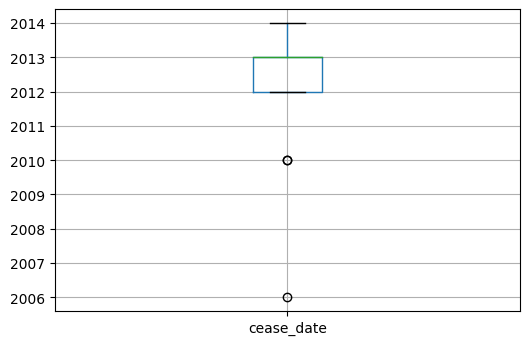

In [130]:
%matplotlib inline
dete_resignations.boxplot(column='cease_date')

In [131]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

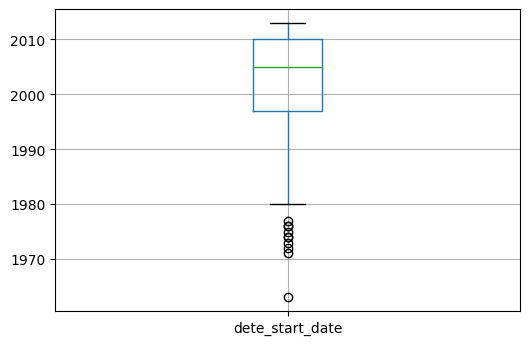

In [132]:
dete_resignations.boxplot(column='dete_start_date')

In [133]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

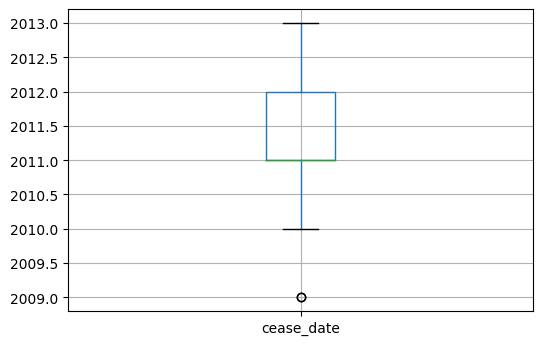

In [134]:
tafe_resignations.boxplot(column='cease_date')

There aren't any major issues with the years in the dataset. 

Our end goal is answering the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of *service*. The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyse both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

## Adding a New Column

In [135]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

We've added a new column for years of service to analyse survey respondents according to their length of employment. We shall identify any employees who resigned because they were dissatisfied next.

## Identify Dissatisfied Employees

From the `tafe_resignations` data set `Contributing Factors. Dissatisfaction`, `Contributing Factors. Job Dissatisfaction` and `Contributing Factors. Interpersonal Conflict` shall be categorised as 'dissatisfied' in a new column.

From the `dete_resignations` data set `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`, `lack_of_job_security`, `work_location`, `employment_conditions`, `work_life_balance` and `workload` shall be categorised as 'dissatisfied' in a new column. 

In [136]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [137]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [138]:
tafe_resignations['Contributing Factors. Interpersonal Conflict'].value_counts()

-                         308
Interpersonal Conflict     24
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

In [139]:
# create a function to convert values
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

In [140]:
# apply function to all the three columns
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict']].applymap(update_vals)

In [141]:
# create a new column and assign the 'True' value if even one of the three columns is 'True'
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict']].any(axis=1, skipna=False)

In [142]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [143]:
job_diss = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 
            'physical_work_environment', 'lack_of_recognition', 
            'lack_of_job_security', 'work_location', 
            'employment_conditions', 'work_life_balance', 
            'workload']

# create a new column and assign the 'True' value if even one of the three columns is 'True'
dete_resignations['dissatisfied'] = dete_resignations[job_diss].any(axis=1, skipna=False)

In [144]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [145]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

The newly created `dissatisfied` columns in both the data sets categorise all the cases where employees left their jobs because of them being dissatisfied.

## Combine the Data

In [146]:
# add column to both the data sets consisting of institue name's acronym
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [147]:
# combine both the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [148]:
# drop columns with less than 500 non-null values
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


Both the datasets have been combined and cleaned by omitting all the columns but the ones with more than 500 non-null values. Columns with less than 500 non-null values are unnecessary for the analysis that we are conducting and hence thee `thresh` parameter in the `pd.dropna()` function was set to `500`.

## Clean the Service Column

We shall be categorising the values according to the number of years spent at a company into distinct stages. The stages are as follows:

- New: Less than 3 years at a company

- Experienced: 3-6 years at a company

- Established: 7-10 years at a company

- Veteran: 11 or more years at a company

In [149]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


In [150]:
# change type to 'str'
combined['institute_service'] = combined['institute_service'].astype(str)

# extract years of service
combined['institute_service'] = combined['institute_service'].str.extract(r'(\d+)')

# convert the series type to float
combined['institute_service'] = combined['institute_service'].astype(float)

In [151]:
combined['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [152]:
# create a function to categorise employees in career stages
# on the basis of years spent at the company
def career_stg(val):
    if val < 3:
        return 'New'
    elif val > 3 and val < 6:
        return 'Experienced'
    elif val > 6 and val < 10:
        return 'Established'
    elif val > 10:
        return 'Veteran'
    else:
        return np.nan

# assign applied function to a new column in the dataframe    
combined['service_cat'] = combined['institute_service'].apply(career_stg)    

In [153]:
# inspect values in new column
combined['service_cat'].value_counts(dropna=False)

NaN            194
New            193
Veteran        136
Experienced     72
Established     56
Name: service_cat, dtype: int64

The following are the steps of how we cleaned the `institute_service` column:

- We extracted values from the `institute_service` column so that values are in the same form and reassigned them to the same column. 

- We created a function to categorise all of the values into stages according to the years spent at company and assigned them to a new `service_cat` column in the dataframe.

## Perform Analysis

In [154]:
# confirm the number of True, False and NaN values in the column
combined['dissatisfied'].value_counts(dropna=False)

False    397
True     246
NaN        8
Name: dissatisfied, dtype: int64

In [155]:
# replace missing values with value that occurs most frequently
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)

In [156]:
# calculate the percentage of dissatisfied employees in 
# each 'service_cat' column group
p_tab = combined.pivot_table(values='dissatisfied', index='service_cat')

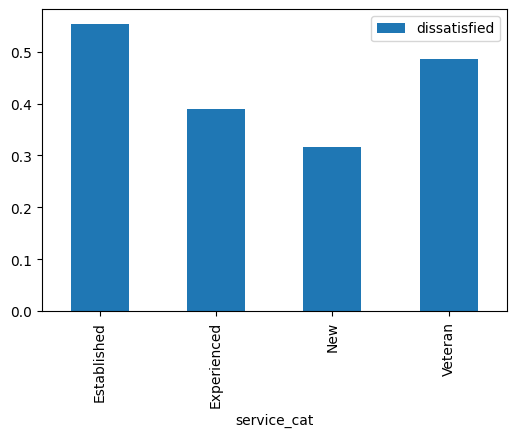

In [157]:
p_tab.plot(kind='bar')

We folowed the folowing steps in the analysis conducted above:

- We confirmed all the values in the `dissatisfied` column and replaced the `NaN` values with the highest occuring `False` values in the column.

- We calculated the percentage of dissatisfied employees in each of the stages in the `service_cat` column and assigned it to a variable.

- We then plotted that variable in the form of a bar plot to visualise the percentages.

## Conclusion

The observations noted with the help of the visualisation are as follows:

- The highest number of dissatisfied employees fall under the `Established` stage, i.e. people with 7-10 years of experience at a company.

- The second highest group of dissatisfied employees are from the `Veteran` stage, i.e. people with 10+ years of work experience.

- Third highest are employees from the `Experienced` stage, i.e. people with 3-6 years of work experience.

- And, the lowest percentage of dissatisfied employees are from the `New` stage, i.e. people with less than 3 years of work experience.